# Module 1 Project- Collin Loo and Cary Mosley

In [196]:
#import the modules and read in the data file
import pandas as pd
import numpy as np
import re
import lxml
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [112]:
#cleaning some data/removing a few outliers
df = pd.read_csv('mergedData.csv')
df = df.loc[df['Score'] >= 1]
df = df.loc[df['Popularity'] <= 105]
df = df.loc[df['Rating']>0.5]
df['Log Gross']= np.log(df['Gross'])
df_ROI = df.loc[df['Budget'] != 0]
df_ROI['Budget'] = df_ROI['Budget']*1000000
df_ROI['Log Budget']= np.log(df_ROI['Budget'])

df_ROI['ROI']=df_ROI['Gross']/df_ROI['Budget']
df_ROI = df_ROI.loc[df_ROI['ROI']<=10]
df_ROI = df_ROI.loc[df_ROI['ROI']>=.01]


/Users/carymosley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/carymosley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/carymosley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

We want to know whether a movies "quality' based on either IMDB rating, metacritic score, or the Movie DB popularity has a strong correlation with the gross revenue for a movie. Surpisingly it doesn't! The correlations we found were all quite low between each of these quality metrics and the movie's gross. We looked at Log of the gross to make sure the correlation wasn't being ruined by outliers and found the same results. We looked at this versus ROI also and found a similar low level of correlation. There was a significantly higher correlation between popularity and box office revenue which makes sense as it is an indicator for people going to see the film versus it just being highly rated.

In [197]:
df['Gross'].describe()


<Figure size 1440x720 with 0 Axes>

0.19717002874753162

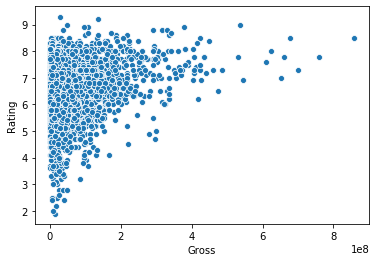

In [198]:
#scatter plot and correlation of IMDB rating and gross revenue
ax = sns.scatterplot(x = 'Gross',y = 'Rating', data = df)
df['Gross'].corr(df['Rating'])

0.07339985687316262

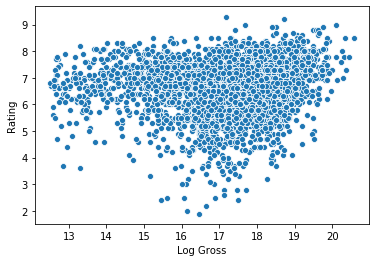

In [53]:
#scatter plot and correlation of IMDB rating and log gross revenue
ax = sns.scatterplot(x = 'Log Gross',y = 'Rating', data = df)
df['Log Gross'].corr(df['Rating'])

0.18432223861705496

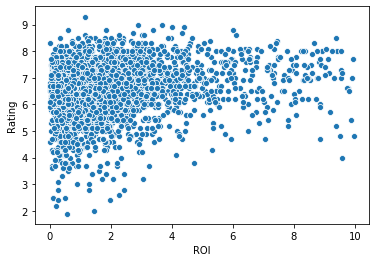

In [54]:
#scatter plot and correlation of IMDB rating and ROI
ax = sns.scatterplot(x = 'ROI',y = 'Rating', data = df_ROI)
df_ROI['ROI'].corr(df_ROI['Rating'])

0.1529301137201682

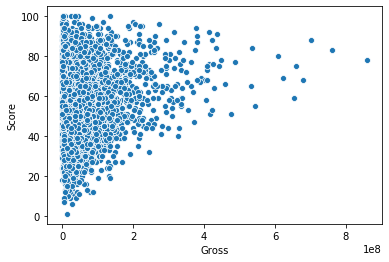

In [55]:
#scatter plot and correlation of metacritic score and gross revenue
ax = sns.scatterplot(x = 'Gross',y = 'Score', data = df)
df['Gross'].corr(df['Score'])

0.008088372850997859

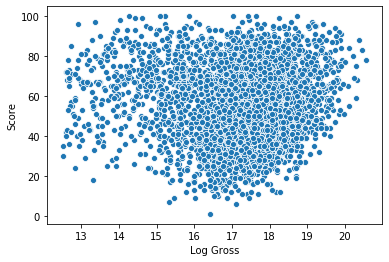

In [56]:
#scatter plot and correlation of metacritic score and log gross revenue
ax = sns.scatterplot(x = 'Log Gross',y = 'Score', data = df)
df['Log Gross'].corr(df['Score'])

0.19934146088388446

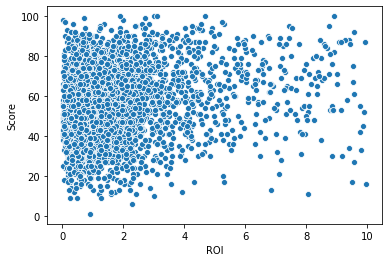

In [57]:
#scatter plot and correlation of metacritic score and ROI
ax = sns.scatterplot(x = 'ROI',y = 'Score', data = df_ROI)
df_ROI['ROI'].corr(df_ROI['Score'])

We found a stronger correlation between Popularity and Gross which makes sense 

0.49440070469515196

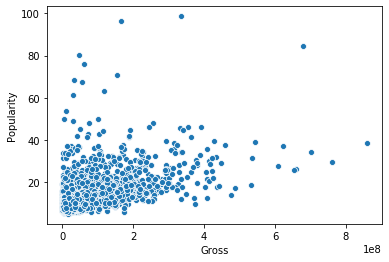

In [58]:
#scatter plot and correlation of the Movie DB popularity and gross revenue
ax = sns.scatterplot(x = 'Gross',y = 'Popularity', data = df)
df['Gross'].corr(df['Popularity'])

0.3709218959682178

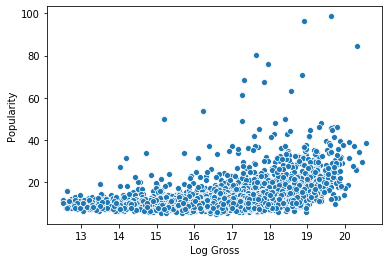

In [59]:
#scatter plot and correlation of the Movie DB popularity and log gross revenue
ax = sns.scatterplot(x = 'Log Gross',y = 'Popularity', data = df)
df['Log Gross'].corr(df['Popularity'])

0.06480325554579171

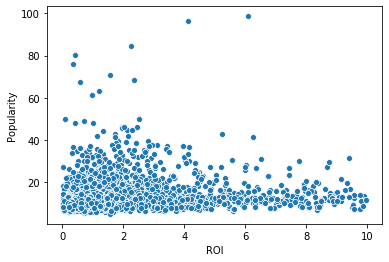

In [60]:
#scatter plot and correlation of the Movie DB popularity and gross revenue
ax = sns.scatterplot(x = 'ROI',y = 'Popularity', data = df_ROI)
df_ROI['ROI'].corr(df_ROI['Popularity'])


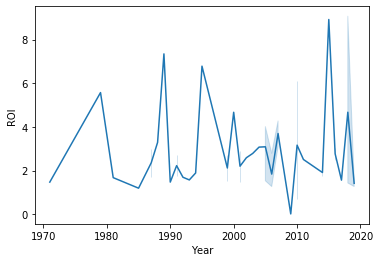

In [209]:
#looking at ROI over time

yvalues = df_ROI['ROI'].groupby(df_ROI['Year']).mean()
sns.lineplot(x = df_ROI['Year'], y = yvalues)

Over the years the average ROI was 2.8 with a standard deviation of 1.8 so we can be relatively confident that the movie industry as a whole has postiive ROI

In [211]:
yvalues.describe()

count    68.000000
mean      2.876434
std       1.833102
min       0.013347
25%       1.563513
50%       2.504776
75%       3.646542
max       9.066667
Name: ROI, dtype: float64

In [113]:
#split genre lists into columns, didnt end up using this code
df['Genre'] = df['Genre'].apply(lambda x:x.split())
df['Genre1'] = df['Genre'].apply(lambda x:x[0])


In [114]:
def list_Split(list):
    """Returns the second element in the list if present if not returns the first"""
    try:
        x = list[1]
    except:
        x = list[0]
    return x
def list_Split2(list):
    """Returns the third element in the list if present if not returns the first"""
    try:
        x = list[2]
    except:
        x = list[0]
    return x
df['Genre2'] = df['Genre'].apply(lambda x:list_Split(x))
df['Genre3'] = df['Genre'].apply(lambda x:list_Split2(x))

Another question we're looking at is whether star choice matters and which stars we should suggest Microsoft hire. In order to do this we looked at the whether there were distinct differences in Gross/ROI by star. We found that theres a long tail in ROI by star which means choosing the right stars can have a dramatic impact on profitability! We then looked at stars who appeared in multiple movies and suggested the top 25 highest grossing stars. 

In [116]:
#breaking the list of 4 stars into seperate columns
stars = df['Stars'].str.split(",",n=1,expand = True)
df['Star1'] = stars[0]
df['Star2'] = stars[1]
stars2 = df['Star2'].str.split(",",n=1,expand = True)
df['Star2']=stars2[0]
df['Star3']=stars2[1]
stars3 = df['Star3'].str.split(",",n=1,expand = True)
df['Star3']=stars3[0]
df['Star4']=stars3[1]

In [155]:
#creating new dataframes that including title, gross and a single star
df1 = df[['Title','Gross','Star1']].copy()
df2 = df[['Title','Gross','Star2']].copy()
df3 = df[['Title','Gross','Star3']].copy()
df4 = df[['Title','Gross','Star4']].copy()
df1.rename(columns={'Star1':'Star'},inplace = True)
df2.rename(columns={'Star2':'Star'},inplace = True)
df3.rename(columns={'Star3':'Star'},inplace = True)
df4.rename(columns={'Star4':'Star'},inplace = True)

In [156]:
#merging the data frames together
frames = [df1,df2,df3,df4]
stacked_df = pd.concat(frames)

In [161]:
grouped = stacked_df.groupby(stacked_df['Star']).describe()

In [166]:
grouped.columns = grouped.columns.droplevel()

In [213]:
#looking at stars who appeared in multiple films
grouped2 = grouped.loc[grouped['count']>2]
grouped1 = grouped.loc[grouped['count']>1]

In [204]:
xvalues = grouped2.sort_values('mean',ascending = False)[0:25].index
yvalues= grouped2.sort_values('mean',ascending = False)[0:25]['mean']/1000000

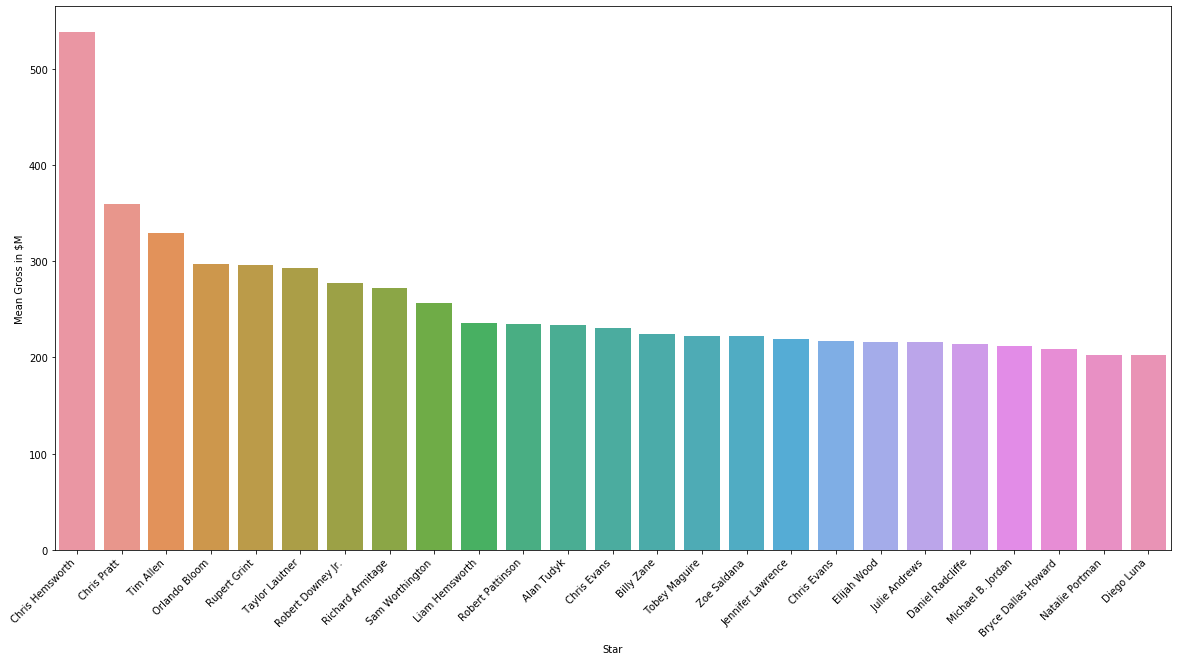

In [207]:
newfig = plt.figure(figsize = (20,10))
ax = sns.barplot(xvalues,yvalues)
ax.set(xlabel='Star', ylabel='Mean Gross in $M')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha = 'right')
plt.show()

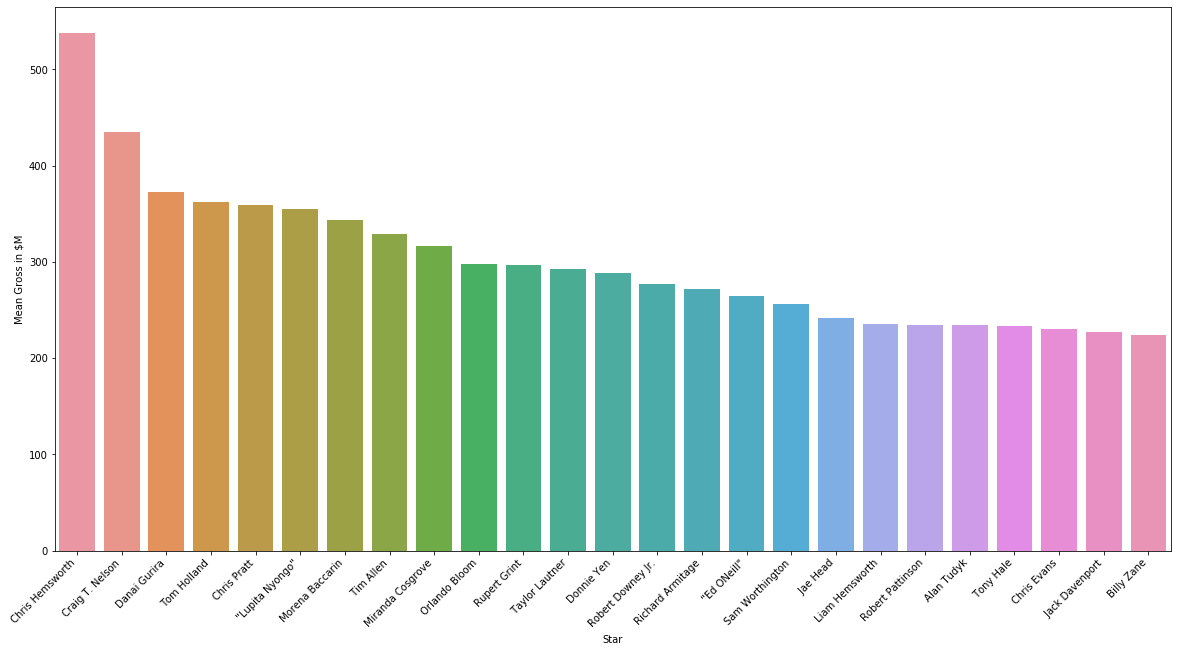

In [214]:
xvalues = grouped1.sort_values('mean',ascending = False)[0:25].index
yvalues= grouped1.sort_values('mean',ascending = False)[0:25]['mean']/1000000
newfig = plt.figure(figsize = (20,10))
ax = sns.barplot(xvalues,yvalues)
ax.set(xlabel='Star', ylabel='Mean Gross in $M')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha = 'right')
plt.show()

Creating new dataframes so we can examine whether star choice can drive a movies ROI and gross revenue

In [217]:
stars_ROI = df_ROI['Stars'].str.split(",",n=1,expand = True)
df_ROI['Star1'] = stars_ROI[0]
df_ROI['Star2'] = stars_ROI[1]

Looking at both the first and second billed movie star to see how that impacts ROI and Gross

In [218]:
stars2 = df['Star2'].str.split(",",n=1,expand = True)
stars2_ROI = df_ROI['Star2'].str.split(",",n=1,expand = True)
df['Star2'] = stars2[0]
df_ROI['Star2'] = stars2_ROI[0]
stars = df[['Star1', 'Star2','Gross', 'Log Gross']].groupby('Star1').median().sort_values('Gross', ascending = False)
stars2 = df[['Star1', 'Star2','Gross', 'Log Gross']].groupby('Star2').median().sort_values('Gross', ascending = False)
stars_ROI = df_ROI[['Star1', 'Star2','Gross','ROI', 'Log Gross']].groupby('Star1').median().sort_values('ROI', ascending = False)
stars2_ROI = df_ROI[['Star1', 'Star2','Gross','ROI', 'Log Gross']].groupby('Star2').median().sort_values('ROI', ascending = False)


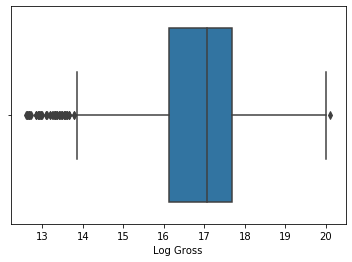

In [219]:
sns.boxplot(stars['Log Gross'])

In [220]:
stars_greater1_ROI = stars_ROI.loc[stars_ROI['ROI']>=1]
stars_greater1_ROI.describe()

,Gross,ROI,Log Gross
count,7.240000e+02,724.000000,724.000000
mean,5.726620e+07,2.619443,17.394934
std,6.515334e+07,1.739175,0.984131
min,4.440980e+05,1.000455,13.003801
25%,2.263323e+07,1.372531,16.901146
50%,4.086134e+07,2.086120,17.499854
75%,6.500514e+07,3.131302,17.968653
max,5.436380e+08,9.968372,20.113794


Text(0.5, 1.0, 'Distribution of ROI by Star')

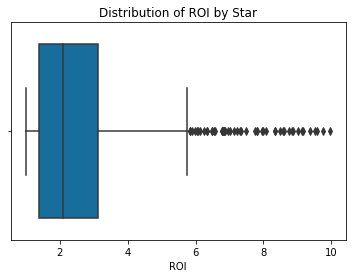

In [221]:
bplot = sns.boxplot(stars_greater1_ROI['ROI'],palette = 'colorblind')
bplot.axes.set_title('Distribution of ROI by Star')

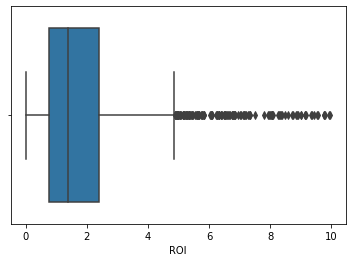

In [227]:
sns.boxplot(stars2_ROI['ROI'])
bplot.axes.set_title('Distribution of ROI by Star')
plt.show()

In [223]:
stars2_greater1_ROI = stars2_ROI.loc[stars2_ROI['ROI']>=1]

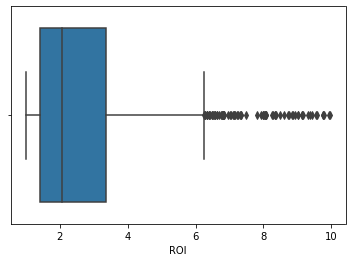

In [224]:
sns.boxplot(stars2_greater1_ROI['ROI'])

In [ ]:
# Load merged data sources.  Mojo & TMDB
mdf = pd.read_csv('mergedData.csv')

In [ ]:
# Preview the dataframe
mdf.head()


In [ ]:
# Check non-zero value cells in revenue and budget columns
np.transpose(mdf.Revenue.to_numpy().nonzero()).shape, np.transpose(mdf.Budget.to_numpy().nonzero()).shape

In [ ]:
# Set up condition to filter cell that have 0 values
condition = (mdf.Revenue != 0) & (mdf.Budget != 0)

# Filter out rows where there is a 0 in both revenue & budget
temp = mdf[condition]

In [ ]:
# Create the goupby year obj. for calculating mean on revenue and budget
filtered_rb = mdf[condition].groupby('Year')

In [ ]:
# Review the descriptive stastistics
filtered_rb[('Revenue', 'Budget')].describe()


Revenue & Budget Mean Over Year Graph

To answer the question whether producing movies will be profitable, we can look at the revenues/costs trending for the last few decades.
The graph plot the revenue and the budget mean over years. It indicates both revenues and budgets are rising . There seems to be a positive correlation between the two.
Examine the distance between the revenue and the budget plot line, it would suggest the profit margin remains positive, despite the rising costs.
The anomalies show on the graph for year around late 1930s and 1950 are due to the lack of data for that period. As a result the mean of those time period skyrocketed.

In [ ]:
# Ploting the revenue & budget mean over years to see the treding of the movie market
ax =filtered_rb[('Revenue', 'Budget')].mean().plot(figsize=(16,9), title='Movie Revenue vs Budget by Years', grid=True)
ax.set_xlabel("Year", fontsize=20)
ax.set_ylabel("In Million", fontsize=20)
ax.title.set_size(30)
plt.show()

In [ ]:

# Create a temporary dataframe for the director graph
t=filtered_rb[('Revenue', 'Budget')].mean().reset_index()

In [ ]:
# Create a groupby obj. by director.  
rev_dtor = mdf.groupby('Director')

In [ ]:
# Create a plot obj of 25 revenue mean by directors
t_25dct = rev_dtor.Revenue.mean().sort_values(ascending=False)[0:25]


The Top 25 Directors with Their Average Movie Gross Chart

If we do decided to make a movie, what strategies can we deploy to make it a success?
This graph may be used as an approach. If movie stars are the soul the movie, then directors are its brain.
Naturally, the next question is should we hire less well know director to save on costs and maximize return on investment. Or should we hire high caliber directors for the project to ensure better chance of success of the film? Equip with the track records of the directors from the plot. We can make the approciate selection in turns plan for a sound budget allocation

In [ ]:
# Plot the graph.
ax = t_25dct.plot(kind='bar',figsize=(16,9), title='Top 25 Directors with Their Average Movie Gross Chart')
ax.set_xlabel("Director", fontsize=20)
ax.set_ylabel("Gross Revenue Mean Value in Million", fontsize=20)
ax.title.set_size(30)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()


Function genres_split Explanations:

Since the genre name is store as a list, we need to parse it out and store in a new coluimn.
This function will take the first element from the list and assign it to the new column

In [ ]:
# Function to parse Genre name string
def genres_split(genre_str):
    '''
    Init_signature:
        genres_split(genre_str)
    Docstring:
        genres_split(genre_str) -> str
        Take input Genre and split the string and extrace the first element as the main Genre for the movie.
    Parameters:
        genre_str is the value in the Genre column of the dataframe 
    '''
    x = genre_str.split(' ')
    if len(x) != 0:
        return x[0]
    else:
        return 'NA'

In [ ]:
# Update the main_genre with the first item in the Genre column strings
mdf['main_genre'] = mdf.Genre.map(genres_split)

In [ ]:
# Create a subset of the dataframe for the period 2009 to 2019 for analysis
mdf09_19 = mdf[(pd.DatetimeIndex(mdf.Release_Date).year >= 2009) & (pd.DatetimeIndex(mdf.Release_Date).year <= 2019)]

The Top Box Office Grossing Movie by Genres Graph

This graph will try to answer the question, what type of movie should we make? We are our audience taste of movie for the last five to ten years.
By plotting out the performances of each movie genre for the last ten years. We can get a sense of our audience movie genre preferrences. This is an important factor to consider when making a new movie.

In [ ]:

# Plot the graph for each genre with their Gross mean
ax = mdf09_19.groupby('main_genre')['Revenue'].mean().plot(kind='barh',
                                                   figsize=(16,9),
                                                   title='Top Box Office Grossing Movie by Genres',
                                                   color = 'green'
                                                  )

ax.set_xlabel("Gross Mean Revenue in Million", fontsize=20)
ax.set_ylabel("Movie Genre", fontsize=20)
ax.title.set_size(30)
plt.show()

The Number of Titles by Genres by Year Graph

The purpose of this chart is to show the saturation of the movie genres market segment.
This is supplement the Top Box Office Grossing Movie by Genres graph. By evaluating both charts, we can see that the animation genre is on the rise, which might explain why it is the top on the Gross Mean Revenue chart. On the other hand, both action and adventure titles seem to be on a decline yet they still perform well in the market, based on the Gross Mean Revenue chart. To avoid a saturated market, it might be a better choice to produce action or adventure genre type of movies